In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_base = pd.read_csv("../data/bert_base_emontions_2023_04_16-08_02_34_PM.csv", header=None)
df_emb = pd.read_csv("../data/bert_base_emontions_mixup_embedding_2023_04_16-08_59_34_PM.csv", header=None)

In [3]:
def func(df):
    index = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()
        arr_row = [int(x[-2]) for x in arr_row]
        target = arr_row[0]
        for idx, i in enumerate(reversed(arr_row[1:])):
            if target == i:
                continue
            elif target != i and idx == 0:
                index.append(8)
                break
            elif target != i:
                index.append(len(arr_row)-idx-1)
                break

        # print("========")
        # print(index[-1])
        # print(arr_row)
        # print("========")

    return index


In [4]:
df_base_converted = func(df_base)
df_emb_converted = func(df_emb)

In [5]:
df_base_converted_filltered = []
for i in df_base_converted:
    if i == 1:
        continue
    df_base_converted_filltered.append(i)

df_emb_converted_filltered = []
for i in df_emb_converted:
    if i == 1:
        continue
    df_emb_converted_filltered.append(i)

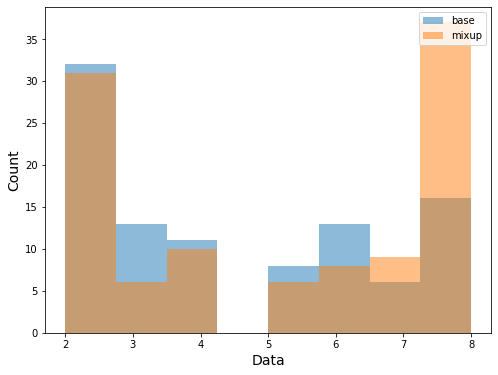

In [6]:
plt.figure(figsize=(8,6))
plt.hist(df_base_converted_filltered, bins=8, alpha=0.5, label="base")
plt.hist(df_emb_converted_filltered, bins=8, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.savefig("test_bert_emotions.png")